In [1]:
import os
import numpy as np
import pandas as pd
import random
import string
random.seed(123)
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
green_tripdata_04 = pd.read_csv('task2/green_tripdata_2019-04.csv')
green_tripdata_05 = pd.read_csv('task2/green_tripdata_2019-05.csv')
green_tripdata_06 = pd.read_csv('task2/green_tripdata_2019-06.csv')

yellow_tripdata_04 = pd.read_csv('task2/yellow_tripdata_2019-04.csv')
yellow_tripdata_05 = pd.read_csv('task2/yellow_tripdata_2019-05.csv')
yellow_tripdata_06 = pd.read_csv('task2/yellow_tripdata_2019-06.csv')

In [3]:
print(green_tripdata_04.shape, green_tripdata_05.shape, green_tripdata_06.shape)
print(yellow_tripdata_04.shape, yellow_tripdata_05.shape, yellow_tripdata_06.shape)

(514392, 20) (504887, 20) (471052, 20)
(7433139, 18) (7565261, 18) (6941024, 18)


In [4]:
yellow_tripdata_04.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [5]:
green_tripdata_04.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [6]:
green_cars = pd.concat([green_tripdata_04,green_tripdata_05,green_tripdata_06], ignore_index =True)

In [7]:
green_cars.shape

(1490331, 20)

In [8]:
yellow_cars = pd.concat([yellow_tripdata_04,yellow_tripdata_05,yellow_tripdata_06], ignore_index =True)

In [9]:
yellow_cars.shape

(21939424, 18)

In [10]:
green_cars = green_cars[['lpep_pickup_datetime','lpep_dropoff_datetime','passenger_count', 'trip_distance','tip_amount']]

In [11]:
yellow_cars = yellow_cars[['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count', 'trip_distance','tip_amount']]

In [12]:
green_cars.rename(columns={'lpep_pickup_datetime':'pickup_datetime',
                      'lpep_dropoff_datetime':'dropoff_datetime'},inplace=True)
yellow_cars.rename(columns={'tpep_pickup_datetime':'pickup_datetime',
                      'tpep_dropoff_datetime':'dropoff_datetime'},inplace=True)

In [13]:
green_cars['color']='green'
yellow_cars['color']='yellow'

In [14]:
cars = pd.concat([green_cars,yellow_cars],ignore_index =True)

In [15]:
cars['dropoff_datetime'] = pd.to_datetime(cars['dropoff_datetime'])
cars['pickup_datetime'] = pd.to_datetime(cars['pickup_datetime'])

In [17]:
cars['travel_time'] = cars['dropoff_datetime'] - cars['pickup_datetime']

In [18]:
cars['travel_time_minutes'] = cars['travel_time'].apply(lambda x : x.total_seconds()/60) # Minute = 60 Seconds

In [19]:
cars['speed_per_minute'] = cars['trip_distance']/cars['travel_time_minutes'] # Speed = Distance/time

In [20]:
cars['pickup_month'] = cars['pickup_datetime'].apply(lambda x: x.month)

In [21]:
cars['dropoff_month'] = cars['dropoff_datetime'].apply(lambda x: x.month)

In [22]:
cars[cars['pickup_month'] != cars['dropoff_month']].shape # There are 8917 rides where pickup and drop off months are different.

(8917, 11)

In [23]:
# Since 8917 is very small when compared to the shape of our data. We will ignore and use pickup date to find pickup hour.
cars['pickup_hour'] = cars['pickup_datetime'].apply(lambda x: x.hour)

### a) Total Trips taken per month

In [24]:
cars['pickup_month'].value_counts()

5     8070202
4     7947407
6     7411620
3         166
1         124
7          86
12         53
8          45
9          39
10         12
11          1
Name: pickup_month, dtype: int64

### b) Average Speed taken by Yellow Taxis per Hour of trips

In [25]:
# Checking if there are null values in speed_per_minute
cars[cars.speed_per_minute.isna()]

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,tip_amount,color,travel_time,travel_time_minutes,speed_per_minute,pickup_month,dropoff_month,pickup_hour
1020,2019-04-01 05:31:37,2019-04-01 05:31:37,1,0.0,0.00,green,0 days,0.0,NaN,4,4,5
1444,2019-04-01 07:30:42,2019-04-01 07:30:42,1,0.0,0.00,green,0 days,0.0,NaN,4,4,7
2807,2019-04-01 08:39:46,2019-04-01 08:39:46,1,0.0,0.00,green,0 days,0.0,NaN,4,4,8
2808,2019-04-01 08:41:10,2019-04-01 08:41:10,1,0.0,0.00,green,0 days,0.0,NaN,4,4,8
3354,2019-04-01 09:12:00,2019-04-01 09:12:00,1,0.0,0.00,green,0 days,0.0,NaN,4,4,9
3355,2019-04-01 09:44:00,2019-04-01 09:44:00,1,0.0,0.00,green,0 days,0.0,NaN,4,4,9
3356,2019-04-01 09:45:00,2019-04-01 09:45:00,1,0.0,0.00,green,0 days,0.0,NaN,4,4,9
3357,2019-04-01 09:10:00,2019-04-01 09:10:00,1,0.0,0.00,green,0 days,0.0,NaN,4,4,9
3359,2019-04-01 09:18:00,2019-04-01 09:18:00,1,0.0,0.00,green,0 days,0.0,NaN,4,4,9
3360,2019-04-01 09:29:00,2019-04-01 09:29:00,1,0.0,0.00,green,0 days,0.0,NaN,4,4,9


In [26]:
print(cars.speed_per_minute.isna().sum()) #These could be cancelled rides.Replacing thier speed with 0
cars.speed_per_minute.fillna(0,inplace=True)

23903


In [27]:
#These are the rides that are very less distant and took very less time to complete.
cars[cars.speed_per_minute == cars.speed_per_minute.max()]

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,tip_amount,color,travel_time,travel_time_minutes,speed_per_minute,pickup_month,dropoff_month,pickup_hour
802,2019-04-01 04:02:59,2019-04-01 04:02:59,2,0.01,0.00,green,0 days,0.0,inf,4,4,4
803,2019-04-01 04:02:59,2019-04-01 04:02:59,2,0.01,0.00,green,0 days,0.0,inf,4,4,4
14667,2019-04-01 19:49:03,2019-04-01 19:49:03,1,2.40,0.00,green,0 days,0.0,inf,4,4,19
60740,2019-04-04 09:46:24,2019-04-04 09:46:24,1,0.01,0.00,green,0 days,0.0,inf,4,4,9
61464,2019-04-04 09:20:21,2019-04-04 09:20:21,1,0.01,0.00,green,0 days,0.0,inf,4,4,9
63207,2019-04-04 11:48:42,2019-04-04 11:48:42,1,0.08,0.00,green,0 days,0.0,inf,4,4,11
112998,2019-04-06 18:33:24,2019-04-06 18:33:24,1,3.80,0.00,green,0 days,0.0,inf,4,4,18
176233,2019-04-10 14:30:08,2019-04-10 14:30:08,1,0.08,0.00,green,0 days,0.0,inf,4,4,14
221449,2019-04-12 22:53:16,2019-04-12 22:53:16,1,1.30,2.00,green,0 days,0.0,inf,4,4,22
245534,2019-04-14 09:23:50,2019-04-14 09:23:50,1,0.27,0.00,green,0 days,0.0,inf,4,4,9


In [28]:
# These 939 is very small when compared with 23429755. So lets remove them
ids = cars[cars.speed_per_minute == cars.speed_per_minute.max()].index
cars.drop(ids,axis=0,inplace=True)

### Hourly average speed(units/minute) in yellow cars

In [29]:
cars.loc[cars.color == 'yellow'].groupby(['pickup_hour']).agg({
    'speed_per_minute':'mean'
})

,speed_per_minute
pickup_hour,
0,0.284579
1,0.293287
2,0.290381
3,0.306769
4,0.361771
5,0.359927
6,0.290615
7,0.223994
8,0.187119


### c)	Percentage of Total trips falling in 5 different Tip Bins

In [172]:
cars.tip_amount.value_counts()

 0.00     7664141
 1.00     1262775
 2.00      834012
 1.50      300384
 2.06      277704
 1.96      274012
 2.16      270328
 1.86      263446
 2.26      261243
 3.00      260277
 2.36      248421
 1.76      237811
 2.46      237105
 2.56      222834
 2.66      209952
 1.66      200553
 2.45      195171
 2.76      192178
 2.86      179076
 5.00      170741
 1.95      163620
 2.96      162177
 1.56      146993
 3.06      146192
 2.05      145298
 2.15      137829
 1.85      136173
 2.95      135962
 3.16      133155
 2.25      127629
           ...   
 27.07          1
 60.88          1
 33.87          1
 33.63          1
 28.07          1
 47.12          1
 29.43          1
 44.62          1
 45.87          1
 45.38          1
 30.43          1
 30.32          1
 30.07          1
 42.37          1
 30.93          1
 43.63          1
 43.62          1
 30.57          1
 31.93          1
 41.63          1
 41.12          1
-0.04           1
 52.12          1
 53.88          1
 53.62    

In [200]:
t = cars.tip_amount.max()

In [201]:
cars['tip_bins'] = pd.cut(cars['tip_amount'], bins=[0,1,2,3,4,t],include_lowest=True,labels=['bin1','bin2','bin3','bin4','bin5'])

In [202]:
cars['tip_bins'].value_counts()

bin1    9226557
bin3    4719400
bin2    4090299
bin5    3120333
bin4    2271677
Name: tip_bins, dtype: int64

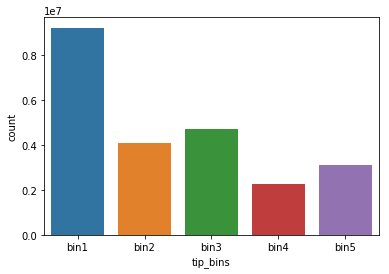

In [203]:
sns.countplot(cars['tip_bins'])
plt.show()

In [204]:
print('Percentage of Total trips falling in 5 different Tip Bins')
cars['tip_bins'].value_counts(normalize=True)

Percentage of Total trips falling in 5 different Tip Bins


bin1    0.393822
bin3    0.201440
bin2    0.174588
bin5    0.133187
bin4    0.096963
Name: tip_bins, dtype: float64

### d)	Percentage of total taxi trips taking a certain average speed. Mostly average speed are between 5.50 and 39 mph

In [30]:
cars['speed_per_hour'] = cars['speed_per_minute']*60

In [31]:
cars['speed_per_hour'].min()

-1.6468435498627632

In [33]:
# Some rides are having dropoff time less than pickup time. Thats not possible.
cars[cars['speed_per_minute'] < 0]

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,tip_amount,color,travel_time,travel_time_minutes,speed_per_minute,pickup_month,dropoff_month,pickup_hour,speed_per_hour
945956,2019-05-27 11:56:30,2018-09-13 12:08:57,1,7.1,4.35,green,-256 days +00:12:27,-368627.550000,-0.000019,5,9,11,-0.001156
3848096,2019-04-10 10:51:55,2019-04-10 09:57:16,1,1.5,0.00,yellow,-1 days +23:05:21,-54.650000,-0.027447,4,4,10,-1.646844
13191889,2019-05-17 17:46:11,2019-05-13 18:08:44,1,1.8,3.15,yellow,-4 days +00:22:33,-5737.450000,-0.000314,5,5,17,-0.018824
14697934,2019-05-23 18:30:34,2019-05-21 18:53:23,1,0.9,0.00,yellow,-2 days +00:22:49,-2857.183333,-0.000315,5,5,18,-0.018900
15385596,2019-05-27 10:13:54,2018-09-13 10:38:20,2,10.4,0.00,yellow,-256 days +00:24:26,-368615.566667,-0.000028,5,9,10,-0.001693
16764348,2019-06-02 03:03:08,2019-05-30 13:53:34,1,1.9,0.00,yellow,-3 days +10:50:26,-3669.566667,-0.000518,6,5,3,-0.031066
20827856,2019-06-19 17:51:49,2019-06-18 18:42:02,1,1.6,3.75,yellow,-1 days +00:50:13,-1389.783333,-0.001151,6,6,17,-0.069076
22674931,2019-06-27 15:15:30,2019-06-24 15:56:07,1,1.5,1.60,yellow,-3 days +00:40:37,-4279.383333,-0.000351,6,6,15,-0.021031


In [34]:
#Removing above faulty records.
ids = cars[cars['speed_per_minute'] < 0].index
cars.drop(ids,axis=0,inplace=True)

In [235]:
cars['speed_per_hour'].dtype

dtype('float64')

In [35]:
cars[(cars['speed_per_hour'] >= 5.50)&(cars['speed_per_hour'] <= 39)].shape

(20700931, 13)

In [36]:
cars.shape

(23428808, 13)

In [37]:
print('Percentage of total taxi trips taking a certain average speed is :')
(20700931/23428808)*100

Percentage of total taxi trips taking a certain average speed:


88.35674012950211

### e)	Percentage of total taxi trips travelling a certain average distance. Most trips are within short distances

In [41]:
cars[cars['trip_distance']<10].shape

(21977902, 13)

In [45]:
print('Percentage of total taxi trips travelling a certain average distance 10 is :')
(21977902/23428808)*100

Percentage of total taxi trips travelling a certain average distance 10 is :


93.80717106905311

In [44]:
cars['trip_distance'].mean()

3.0322924943525074

In [46]:
print('Percentage of total taxi trips travelling a certain average distance 3 is :')
(cars[cars['trip_distance']<cars['trip_distance'].mean()].shape[0]/23428808)*100

Percentage of total taxi trips travelling a certain average distance 3 is :


74.26493486138945